In [17]:
import json
import numpy as np

In [2]:
import napari
viewer = napari.Viewer()

In [8]:
import numpy as np
from TCFile import TCFile

path = r"C:\rkka_Projects\cell_death_v1\Data\Hela_Segmentation_test_PWS\TCF\230510.174730.HeLa_Hoechst.001.Group1.A2.T001P17.TCF"
file = TCFile(path, '2DMIP')

In [9]:
viewer.add_image(np.array(file))

c:\miniconda3\envs\cell\Lib\site-packages\TCFile\TCFile_class.py:190: UserWarning: You use an experimental file format deprecated.
Update your reconstruction program and rebuild TCF file.
  warnings.warn(("You use an experimental file format deprecated.\n"


<Image layer 'Image' at 0x29ea26d2120>

In [18]:
apoptosis = []
necroptosis = []
nectosis = []
live = []

# Open the JSON file
with open('probabilities_json/test_probs.json', 'r') as file:
    test_probabilities = json.load(file)

with open('probabilities_json/train_probs.json', 'r') as file:
    train_probabilities = json.load(file)

with open('probabilities_json/live_probs.json', 'r') as file:
    live_probabilities = json.load(file)

In [19]:
pathways = ['apoptosis', 'necroptosis', 'necrosis', 'live']
pathways_range = dict()
pathways_range['apoptosis_test'] = (2, 4)
pathways_range['apoptosis_train'] = (6, 13)
pathways_range['necroptosis_test'] = (0, 1)
pathways_range['necroptosis_train'] = (0, 5)
pathways_range['necrosis_test'] = (5, 6)
pathways_range['necrosis_train'] = (14, 17)
pathways_range['live'] = (0,4)

probabilities = dict()
for path in pathways:
    probabilities[path] = []
    if path != 'live':
        test = pathways_range[path+'_test']
        train = pathways_range[path+'_train']
        
        for idx, total in enumerate(test_probabilities):
            if test[0] <= idx and idx <= test[1]:
                probabilities[path].append(total['probability'][:36])
            else:
                pass

        for idx, total in enumerate(train_probabilities):
            if train[0] <= idx and idx <= train[1]:
                probabilities[path].append(total['probability'][:36])
            else:
                pass
    else:
        for idx, total in enumerate(live_probabilities):
            if 0 <= idx and idx <= 4:
                probabilities[path].append(total['probability'][:36])
            else:
                pass

data = dict()
for path in pathways:
    data[path+'_mean'] = np.mean(np.array(probabilities[path]), axis=0)
    data[path+'_std'] = np.std(np.array(probabilities[path]), axis=0)

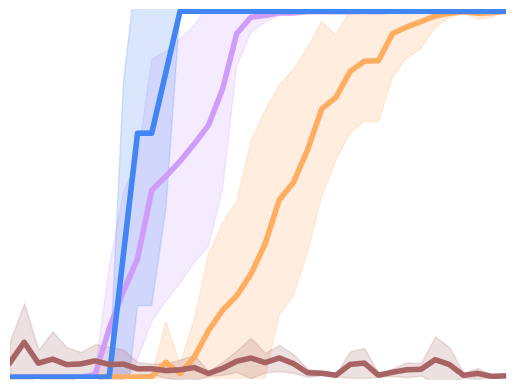

In [ ]:
import matplotlib.pyplot as plt

x_range = 36
x = np.arange(x_range)

pathways = ['apoptosis', 'necroptosis', 'necrosis', 'live']
colors = ['#ffad60ff', '#d09cfaff', '#4285f4ff', '#a86464ff']

for idx, path in enumerate(pathways):
    plt.plot(data[path+'_mean'], linewidth=4, color=colors[idx], label=path)
    plt.fill_between(x, data[path+'_mean']-data[path+'_std'], data[path+'_mean']+data[path+'_std'], alpha=0.2, color=colors[idx])

ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


plt.ylim(-0.005, 1.005)
plt.xlim(0, 35)
# Ticks
# plt.xticks(ticks=[0, 10, 20, 30], labels=['0', '5', '10', '15'], fontsize=18)
# plt.yticks(ticks=[0.25, 0.5, 0.75, 1.0], labels=['0.25', '0.50', '0.75', '1.00'], fontsize=18)

plt.savefig('figures/figure5/pathways_plot.svg', format='svg', transparent=True)
plt.show()

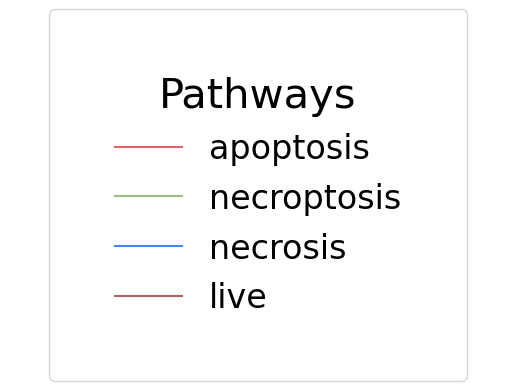

In [ ]:
import matplotlib.pyplot as plt

# Pathways and colors
pathways = ['apoptosis', 'necroptosis', 'necrosis', 'live']
colors = ['#e06666ff', '#9abf80ff', '#4285f4ff', '#a86464ff']

# Create an empty figure
fig, ax = plt.subplots()

# Add legend handles
for idx, path in enumerate(pathways):
    ax.plot([], [], color=colors[idx], label=path)  # Empty plot for legend

# Add legend
ax.legend(title="Pathways", loc='center', fontsize=24, title_fontsize=30, borderpad=2.0)

# Remove axes for clarity
ax.axis('off')

# Show the legend
plt.savefig('figures/figure5/legend.svg', format='svg', transparent=True)
plt.show()


In [12]:
import json

# Open the JSON file
with open('probabilities_json/live_probs.json', 'r') as file:
    total_probabilities = json.load(file)

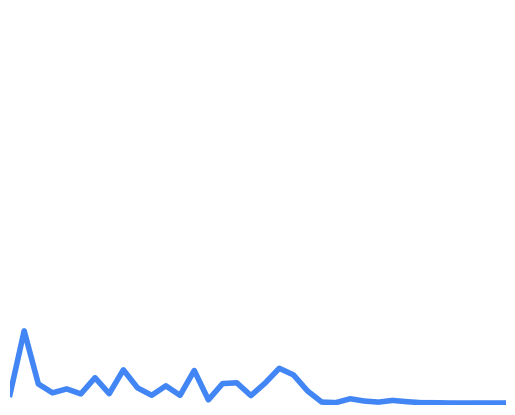

In [13]:
import matplotlib.pyplot as plt

idx = 0
pathway = 'live'
file_name = total_probabilities[idx]['file_name']
probability = total_probabilities[idx]['probability']

# plt.title(file_name, pad=15)
ax = plt.gca()
plt.title(' ', pad=10)
plt.xlim(0, 35)
plt.ylim(-0.005, 1.005)

""""
# Axes
plt.xticks(ticks=[0, 10, 20, 30], labels=['0', '5', '10', '15'], fontsize=18)
plt.yticks(ticks=[0.25, 0.5, 0.75, 1.0], labels=['0.25', '0.50', '0.75', '1.00'], fontsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
"""
# Line
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.plot(probability, linewidth=4, color='#4285f4')

# Labels
# plt.xlabel('Time (h)', fontsize=20, labelpad=10)
# plt.ylabel('Death Probability', fontsize=20, labelpad=10)

# Save
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig("figures/figure4/" + pathway + ".svg", format="svg", transparent=True)

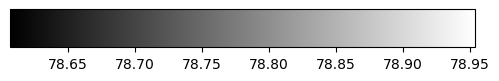

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# Define the range for the colorbar
vmin = 78.60709
vmax = 78.95399

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

# Create a grayscale colormap
cmap = plt.cm.gray

# Create a scalar mappable object for the colorbar
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Add the colorbar
cbar = fig.colorbar(sm, cax=ax, orientation='horizontal')

# Show the plot
plt.show()


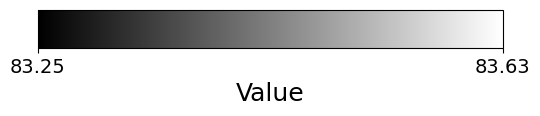

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define range and colormap
vmin, vmax = 83.24932, 83.63323
cmap = plt.get_cmap('gray')  # Grayscale colormap

# Create a figure and axis for the colorbar
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

# Create a normalization object for the colorbar
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# Create the colorbar
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax, orientation='horizontal')

# Set ticks to display only the min and max values
cbar.set_ticks([vmin, vmax])

# Set larger font size for the tick labels
cbar.ax.tick_params(labelsize=20)

# Set custom tick labels (optional, for formatting)
cbar.ax.set_xticklabels([f"{vmin:.2f}", f"{vmax:.2f}"], fontsize=14)

# Add a label to the colorbar (optional)
cbar.set_label('Value', fontsize=18)

# Display the plot
plt.savefig('figures/figure4/scale_bar.svg', format='svg', transparent=True)
plt.show()


In [67]:
from TCFile import TCFile
import numpy as np

path = r"C:\rkka_Projects\cell_death_v1\Data\Hela_Segmentation_test_PWS\TCF\test\230725.094439.HeLa_NaOH.002.Group1.A1.T002P01.TCF"
file = TCFile(path, '3D')
stack = np.array([np.max(file[time_idx], axis=0) for time_idx in range(len(file))])
stack.shape

c:\miniconda3\envs\cell\Lib\site-packages\TCFile\TCFile_class.py:190: UserWarning: You use an experimental file format deprecated.
Update your reconstruction program and rebuild TCF file.
  warnings.warn(("You use an experimental file format deprecated.\n"


(43, 1059, 1059)

In [14]:
from TCFile import TCFile
import numpy as np

path_list = [# r"C:\rkka_Projects\cell_death_v1\Data\Hela_Segmentation_test_PWS\TCF\test\230512.160429.CD95_TNF_Ctr.003.CD95.A1.T001P15.TCF",
             # r"C:\rkka_Projects\cell_death_v1\Data\Hela_Segmentation_test_PWS\TCF\230510.174730.HeLa_Hoechst.001.Group1.A2.T001P25.TCF",
             #r"C:\rkka_Projects\cell_death_v1\Data\Hela_Segmentation_test_PWS\TCF\test\230725.094439.HeLa_NaOH.002.Group1.A1.T002P01.TCF",
             r"C:\rkka_Projects\cell_death_v1\Data\Hela_Segmentation_test_PWS\TCF\live\241126.155819.hela_none_PP2.001.Group1.A1.T001P05.TCF"
             ]
pathway = [#'apoptosis', 
           #'necroptosis', 
           #'necrosis', 
           'live'
           ]
time_list = [0, 24, 35]

min_list = []
max_list = []
for idx, path in enumerate(pathway):
    path = path_list[idx]
    file = TCFile(path, '3D')
    for time in time_list:
        min, max = np.min(np.sum(file[time], axis=0)*file.data_resolution[0]), np.max(np.sum(file[time], axis=0)*file.data_resolution[0])
        min_list.append(min)
        max_list.append(max)

global_min, global_max = np.min(np.array(min_list)), np.max(np.array(max_list))
global_min, global_max

(83.71661, 84.33828)

In [15]:
from PIL import Image
import utils

for idx, path in enumerate(pathway):
    file_path = path_list[idx]
    file = TCFile(file_path, '3D')
    for time in time_list:
        temp = np.sum(file[time], axis=0) * file.data_resolution[0]
        temp = utils._image_normalization(temp, min=global_min, max=global_max)
        image = Image.fromarray(temp)
        image.save(f'figures/figure4/{path}_{time}_qpi.png')

In [5]:
import napari
viewer = napari.Viewer()

In [68]:
viewer.add_image(stack)

<Image layer 'stack [1]' at 0x1f96de37530>

<h3> Scale bar </h3>

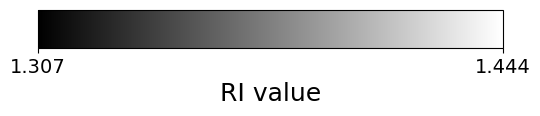

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define range and colormap
vmin, vmax = 1.307, 1.444
cmap = plt.get_cmap('gray')  # Grayscale colormap

# Create a figure and axis for the colorbar
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

# Create a normalization object for the colorbar
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# Create the colorbar
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax, orientation='horizontal')

# Set ticks to display only the min and max values
cbar.set_ticks([vmin, vmax])

# Set larger font size for the tick labels
cbar.ax.tick_params(labelsize=20)

# Set custom tick labels (optional, for formatting)
cbar.ax.set_xticklabels([f"{vmin:.3f}", f"{vmax:.3f}"], fontsize=14)

# Add a label to the colorbar (optional)
cbar.set_label('RI value', fontsize=18)

# Display the plot
plt.savefig('figures/figure2/scalebar.svg', format='svg', transparent=True)
plt.show()


<h1> Single cell 3D </h1>

In [86]:
from TCFile import TCFile

path = r"C:\rkka_Projects\cell_death_v1\Data\Hela_Segmentation_test_PWS\TCF\test\230725.094439.HeLa_NaOH.002.Group1.A1.T002P01.TCF"
file = TCFile(path, '3D')

In [87]:
file[0].shape

(66, 1059, 1059)

In [77]:
viewer.add_image(file[0], scale=(6.45,1,1))

<Image layer 'Image' at 0x1f96ea261e0>

In [80]:
viewer.add_image(np.max(file[0], axis=0))

<Image layer 'Image [1]' at 0x1f970ff83b0>

In [16]:
viewer.layers['Shapes'].data

[array([[ 31.        , 611.44397997, 223.71677333],
        [ 31.        , 611.44397997, 464.11566301],
        [ 31.        , 852.27916527, 464.11566301],
        [ 31.        , 852.27916527, 223.71677333]])]

In [26]:
viewer.layers['Shapes'].data[0].astype(int)

array([[ 31, 611, 223],
       [ 31, 611, 464],
       [ 31, 852, 464],
       [ 31, 852, 223]])

In [31]:
points = np.array([[ 31, 611, 223],
       [ 31, 611, 464],
       [ 31, 852, 464],
       [ 31, 852, 223]])

In [48]:
temp = file[0].copy()
temp.shape

(59, 1009, 1009)

In [49]:
temp[:, 0:611, :] = np.min(file[0])
temp[:, 852:1009, :] = np.min(file[0])
temp[:, :, 0:223] = np.min(file[0])
temp[:, :, 463:1009] = np.min(file[0])

In [39]:
np.min(temp)

1.3146601

In [53]:
viewer.add_image(temp[20:40], scale=(6.45, 1, 1))

<Image layer 'Image' at 0x1f95fc5aa80>

In [28]:
from PIL import Image
import utils
import numpy as np

time_range = [0, 1, 24, 34, 35]
z_range = [30, 31, 32, 33, 34, 35]

# Find global min, max for ri
min_list = []
max_list = []
for time in time_range:
    temp_time = file[time]
    for z in z_range:
        temp_z = temp_time[z]
        ri_min, ri_max = np.min(temp_z), np.max(temp_z)
        min_list.append(ri_min)
        max_list.append(ri_max)
        
min_list = np.array(min_list)
max_list = np.array(max_list)
global_min, global_max = np.min(min_list), np.max(max_list)

global_min, global_max

(1.3124502, 1.420304)

In [29]:
for time in time_range:
    temp_time = file[time]
    for z in z_range:
        temp_z = temp_time[z]
        temp_z = utils._image_normalization(temp_z, min=global_min, max=global_max)
        image = Image.fromarray(temp_z)
        image.save(f"figures/figure2/{time}_{z}.png")

<h3> mip </h3>

In [30]:
# Find global min, max for qpi
min_list = []
max_list = []

for time in time_range:
    temp_time = file[time]
    mip = np.max(temp_time, axis=0)
    mip_min, mip_max = np.min(mip), np.max(mip)
    min_list.append(mip_min)
    max_list.append(mip_max)
    
global_mip_min, global_mip_max = np.min(np.array(min_list)), np.max(np.array(max_list))
global_mip_min, global_mip_max

c:\miniconda3\envs\cell\Lib\site-packages\TCFile\TCFile_class.py:190: UserWarning: You use an experimental file format deprecated.
Update your reconstruction program and rebuild TCF file.
  warnings.warn(("You use an experimental file format deprecated.\n"


(1.3326601, 1.420304)

In [33]:
for time in time_range:
    temp_time = file[time]
    mip = np.max(temp_time, axis=0)
    mip = utils._image_normalization(mip, min=global_mip_min, max=global_mip_max)
    image = Image.fromarray(mip)
    image.save(f"figures/figure2/{time}_mip.png")

c:\miniconda3\envs\cell\Lib\site-packages\TCFile\TCFile_class.py:190: UserWarning: You use an experimental file format deprecated.
Update your reconstruction program and rebuild TCF file.
  warnings.warn(("You use an experimental file format deprecated.\n"


<h3> qpi </h3>

In [35]:
# Find global min, max for qpi
min_list = []
max_list = []

for time in time_range:
    temp_time = file[time]
    qpi = np.sum(temp_time, axis=0)
    qpi_min, qpi_max = np.min(qpi), np.max(qpi)
    min_list.append(qpi_min)
    max_list.append(qpi_max)
    
global_qpi_min, global_qpi_max = np.min(np.array(min_list)), np.max(np.array(max_list))
global_qpi_min, global_qpi_max

c:\miniconda3\envs\cell\Lib\site-packages\TCFile\TCFile_class.py:190: UserWarning: You use an experimental file format deprecated.
Update your reconstruction program and rebuild TCF file.
  warnings.warn(("You use an experimental file format deprecated.\n"


(78.57715, 79.14095)

In [36]:
for time in time_range:
    temp_time = file[time]
    qpi = np.sum(temp_time, axis=0)
    qpi = utils._image_normalization(qpi, min=global_qpi_min, max=global_qpi_max)
    image = Image.fromarray(qpi)
    image.save(f"figures/figure2/{time}_qpi.png")

In [32]:
viewer.add_image(mip)

<Image layer 'mip' at 0x26726333260>

In [20]:
from TCFile import TCFile

path = r"C:\rkka_Projects\cell_death_v1\Data\Hela_Segmentation_test_PWS\TCF\230512.160429.CD95_TNF_Ctr.003.CD95.A1.T001P20.TCF"
file = TCFile(path, '3D')

c:\miniconda3\envs\cell\Lib\site-packages\TCFile\TCFile_class.py:190: UserWarning: You use an experimental file format deprecated.
Update your reconstruction program and rebuild TCF file.
  warnings.warn(("You use an experimental file format deprecated.\n"


<Image layer 'Image [4]' at 0x26716c3f050>

In [32]:
viewer.add_image(stack)

<Image layer 'stack' at 0x2122aeebad0>

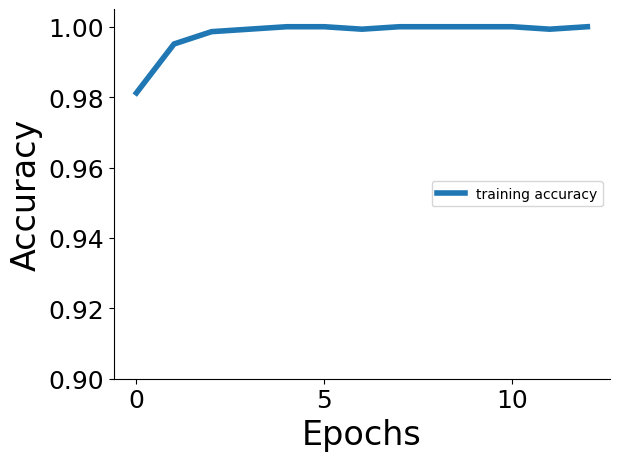

In [23]:
import matplotlib.pyplot as plt

train_acc = [0.9812, 0.9951, 0.9986, 0.9993, 1.0000, 1.0000, 0.9993, 1.0000, 1.0000, 1.0000, 1.0000, 0.9993, 1.0000]

fig, ax = plt.subplots()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('Epochs', fontsize=24)
ax.set_ylabel('Accuracy', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=18)

ax.set_xticks(ticks=(0, 5, 10), labels=['0', '5', '10'])

ax.set_ylim(0.9, 1.005)
ax.plot(train_acc, linewidth=4, label='training accuracy')
ax.legend(loc='right')

plt.savefig('figures/figure3/learning_curve.svg', format='svg', transparent=True)

<h1> fig4 </h1>

In [113]:
from TCFile import TCFile
import numpy as np

path = r"C:\rkka_Projects\cell_death_v1\Data\Hela_Segmentation_test_PWS\TCF\230512.160429.CD95_TNF_Ctr.003.TNF.A2.T001P18.TCF"
file = TCFile(path, '3D')
file[0].shape

(59, 1009, 1009)

In [114]:
file.data_resolution

[1.053344488143921, 0.1632189154624939, 0.1632189154624939]

In [89]:
from TCFile import TCFile
import numpy as np

path_list = [r"C:\rkka_Projects\cell_death_v1\Data\Hela_Segmentation_test_PWS\TCF\test\230512.160429.CD95_TNF_Ctr.003.CD95.A1.T001P15.TCF",
             r"C:\rkka_Projects\cell_death_v1\Data\Hela_Segmentation_test_PWS\TCF\230510.174730.HeLa_Hoechst.001.Group1.A2.T001P25.TCF",
             r"C:\rkka_Projects\cell_death_v1\Data\Hela_Segmentation_test_PWS\TCF\test\230725.094439.HeLa_NaOH.002.Group1.A1.T002P01.TCF",
             r"C:\rkka_Projects\cell_death_v1\Data\Hela_Segmentation_test_PWS\TCF\live\241126.155819.hela_none_PP2.001.Group1.A1.T001P05.TCF"]
pathway = ['apoptosis', 'necroptosis', 'necrosis', 'live']
time_list = [0, 24, 35]

min_list = []
max_list = []
for idx, path in enumerate(pathway):
    path = path_list[idx]
    file = TCFile(path, '3D')
    for time in time_list:
        min, max = np.min(np.sum(file[time], axis=0)), np.max(np.sum(file[time], axis=0))
        min_list.append(min)
        max_list.append(max)

global_min, global_max = np.min(np.array(min_list)), np.max(np.array(max_list))
global_min, global_max

c:\miniconda3\envs\cell\Lib\site-packages\TCFile\TCFile_class.py:190: UserWarning: You use an experimental file format deprecated.
Update your reconstruction program and rebuild TCF file.
  warnings.warn(("You use an experimental file format deprecated.\n"


(78.42734, 104.96552)

In [ ]:
from PIL import Image
import utils

for idx, path in enumerate(pathway):
    file_path = path_list[idx]
    file = TCFile(file_path, '3D')
    for time in time_list:
        temp = np.max(file[time], axis=0)
        temp = utils._image_normalization(temp, min=global_min, max=global_max)
        image = Image.fromarray(temp)
        image.save(f'figures/figure4/{path}_{time}_qpi.png')

In [ ]:
import napari
viewer = napari.Viewer()

In [ ]:
viewer.add_image(stack)

<Image layer 'stack [1]' at 0x1f96de37530>

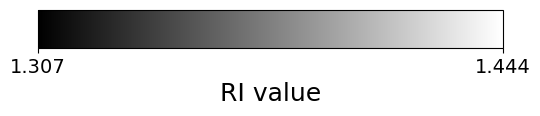

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Define range and colormap
vmin, vmax = 1.307, 1.444
cmap = plt.get_cmap('gray')  # Grayscale colormap

# Create a figure and axis for the colorbar
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

# Create a normalization object for the colorbar
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

# Create the colorbar
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=ax, orientation='horizontal')

# Set ticks to display only the min and max values
cbar.set_ticks([vmin, vmax])

# Set larger font size for the tick labels
cbar.ax.tick_params(labelsize=20)

# Set custom tick labels (optional, for formatting)
cbar.ax.set_xticklabels([f"{vmin:.3f}", f"{vmax:.3f}"], fontsize=14)

# Add a label to the colorbar (optional)
cbar.set_label('RI value', fontsize=18)

# Display the plot
plt.savefig('figures/figure2/scalebar.svg', format='svg', transparent=True)
plt.show()
